In [1]:
pip install opencv-python

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [17]:
DIRECTORY = r"C:\Users\HP\Downloads\task2\dogsvscats"
CATEGORIES = ['cats', 'dogs']

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [19]:
from warnings import filterwarnings
filterwarnings('ignore')

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Initialize the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))
# Compiling the CNN
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
classifier.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])


In [21]:
from keras.preprocessing.image import ImageDataGenerator
DIRECTORY = r"C:\Users\HP\Downloads\task2\dogsvscats" 
CATEGORIES = ['cats', 'dogs']
# Data Augmentation for Training Set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
# Data Augmentation for Test Set
test_datagen = ImageDataGenerator(rescale=1./255)
# Training Set
train_set = train_datagen.flow_from_directory(
    DIRECTORY,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',
    classes=CATEGORIES)
# Validation Set
test_set = test_datagen.flow_from_directory(
    DIRECTORY,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',
    classes=CATEGORIES,
    shuffle=False)


Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [22]:
%%capture
# Calculate the number of batches available in your dataset
num_batches_train = len(train_set)
num_batches_test = len(test_set)

# Set the maximum number of batches for training and validation
max_steps_per_epoch_train = min(800, num_batches_train)
max_steps_per_epoch_test = min(20, num_batches_test)

# Train the classifier
classifier.fit_generator(train_set,
                         steps_per_epoch=max_steps_per_epoch_train,
                         epochs=100,
                         validation_data=test_set,
                         validation_steps=max_steps_per_epoch_test)


In [23]:
from tensorflow.keras.models import load_model
classifier = load_model(r"C:\Users\HP\Downloads\task2\dogsvscats\dogcat_model_bak.h5")

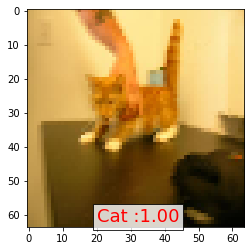

In [24]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img(r"C:\Users\HP\Downloads\task2\dogsvscats\cats\1.png", target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
plt.imshow(img1)
plt.show()


In [25]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [26]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,cats\1.png,0.00000,0,0
1,cats\17.png,0.00000,0,0
2,cats\18.png,0.00000,0,0
3,cats\2.png,0.00000,0,0
4,cats\3.png,0.00000,0,0
5,cats\4.png,0.00002,0,0
6,cats\5.png,0.00000,0,0
7,cats\6.png,0.00000,0,0
8,cats\7.png,0.00000,0,0
9,cats\8.png,0.00000,0,0


In [27]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 20 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 20 Validation images : 0


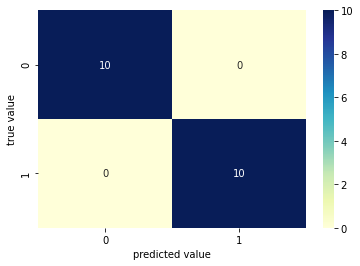

In [28]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

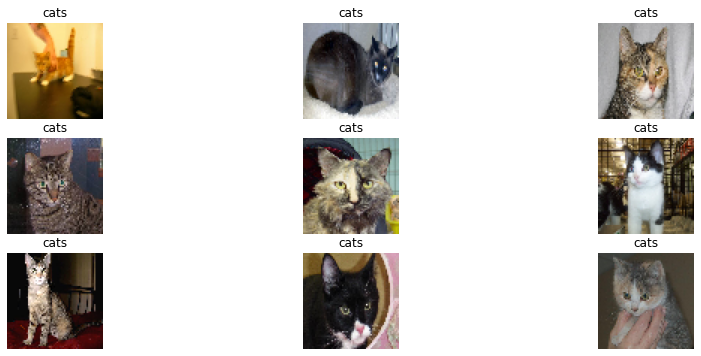

In [29]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
    
DIRECTORY = r"C:\Users\HP\Downloads\task2\dogsvscats"
CATEGORIES = ['cats']

# Define the number of columns and rows for subplots
columns = 3
rows = 3
    
# Create a new figure
fig = plt.figure(figsize=(15, 6))
    
# Loop through the categories (cats and dogs)
for category in CATEGORIES:
    # Get the path to the current category
    path = os.path.join(DIRECTORY, category)
    
    # Get a list of image filenames in the current category
    filenames = os.listdir(path)
    
    # Ensure that the total number of subplots does not exceed the length of the filenames
    total_plots = min(columns * rows, len(filenames))
    
    # Loop through the valid filenames and plot the images
    for i in range(total_plots):
        # Load and display the current image
        img_path = os.path.join(path, filenames[i])
        img = image.load_img(img_path, target_size=(64, 64))
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(img)
        plt.title(category)  # Set title as category
        plt.axis('off')  # Turn off axis labels
    
plt.show()


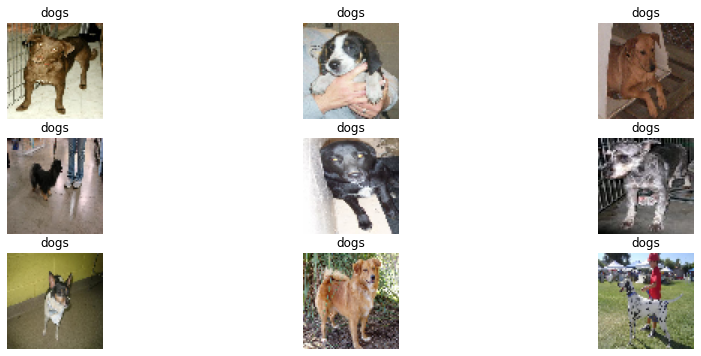

In [30]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image

DIRECTORY = r"C:\Users\HP\Downloads\task2\dogsvscats"
CATEGORIES = ['dogs']
    
# Define the number of columns and rows for subplots
columns = 3
rows = 3

# Create a new figure
fig = plt.figure(figsize=(15, 6))

# Loop through the categories (cats and dogs)
for category in CATEGORIES:
    # Get the path to the current category
    path = os.path.join(DIRECTORY, category)

    # Get a list of image filenames in the current category
    filenames = os.listdir(path)
    
    # Ensure that the total number of subplots does not exceed the length of the filenames
    total_plots = min(columns * rows, len(filenames))
    
    # Loop through the valid filenames and plot the images
    for i in range(total_plots):
        # Load and display the current image
        img_path = os.path.join(path, filenames[i])
        img = image.load_img(img_path, target_size=(64, 64))
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(img)
        plt.title(category)  # Set title as category
        plt.axis('off')  # Turn off axis labels

plt.show()


In [31]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

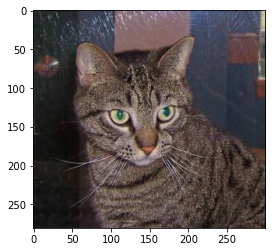

In [41]:
#Input Image for Layer visualization
img1 = image.load_img("C:\\Users\\HP\\Downloads\\task2\\dogsvscats\\cats\\2.png")
plt.imshow(img1);
#preprocess image
img1 = image.load_img("C:\\Users\\HP\\Downloads\\task2\\dogsvscats\\cats\\2.png", target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)


In [42]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_6', 'max_pooling2d_6', 'conv2d_7', 'max_pooling2d_7', 'flatten_3', 'dense_6', 'dense_7']


In [43]:
from tensorflow.keras.models import Model
conv2d_6_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d_6').output)
conv2d_7_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_7').output)

In [44]:
conv2d_6_features = conv2d_6_output.predict(img)
conv2d_7_features = conv2d_7_output.predict(img)
print('First conv layer feature output shape : ',conv2d_6_features.shape)
print('First conv layer feature output shape : ',conv2d_7_features.shape)

First conv layer feature output shape :  (1, 62, 62, 32)
First conv layer feature output shape :  (1, 29, 29, 32)


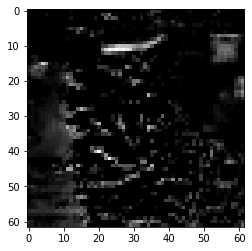

In [45]:
plt.imshow(conv2d_6_features[0, :, :, 4], cmap='gray')

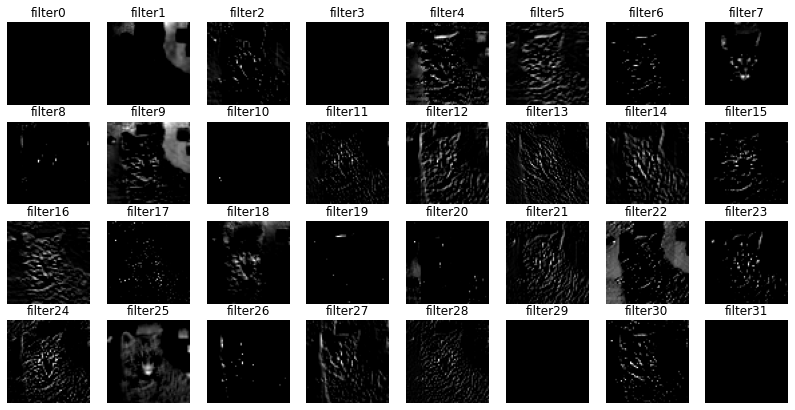

In [46]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_6_features[0, :, :, i], cmap='gray')
plt.show()

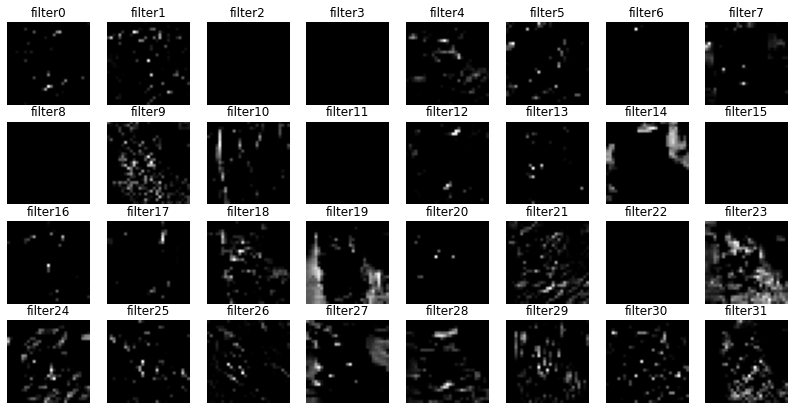

In [47]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_7_features[0, :, :, i], cmap='gray')
plt.show()

In [48]:
import os
import numpy as np
from keras.preprocessing import image

# Define the directory path and categories
DIRECTORY = r"C:\Users\HP\Downloads\task2\dogsvscats"
CATEGORIES = ['cats', 'dogs']

# Load images and labels
data = []
labels = []

# Loop through the categories
for category in CATEGORIES:
    # Get the path to the current category
    path = os.path.join(DIRECTORY, category)
    # Get a list of image filenames in the current category
    filenames = os.listdir(path)
    # Load and preprocess images
    for filename in filenames:
        img_path = os.path.join(path, filename)
        img = image.load_img(img_path, target_size=(64, 64))
        img = image.img_to_array(img)
        img = img / 255.0  # Normalize the image
        data.append(img)
        # Assign label based on category
        if category == 'cats':
            labels.append(0)  # Assign label 0 for cats
        else:
            labels.append(1)  # Assign label 1 for dogs
    
# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)
    
# Evaluate the model
accuracy = classifier.evaluate(data, labels)[1]  # Assuming your model's compile method includes accuracy as a metric
    
print("Model accuracy:", accuracy)


1/1 [==============================] - 0s 110ms/step - loss: 1.4578e-05 - accuracy: 1.0000
Model accuracy: 1.0
